In [ ]:
# Proyecto Integrador: Análisis de Clientes
# Autor: [Tu Nombre]
# Fecha: [Fecha actual]

# 🔧 Cargar librerías necesarias
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 📥 1. Cargar Dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
df = pd.read_csv(url)
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# 📊 2. Limpieza básica
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


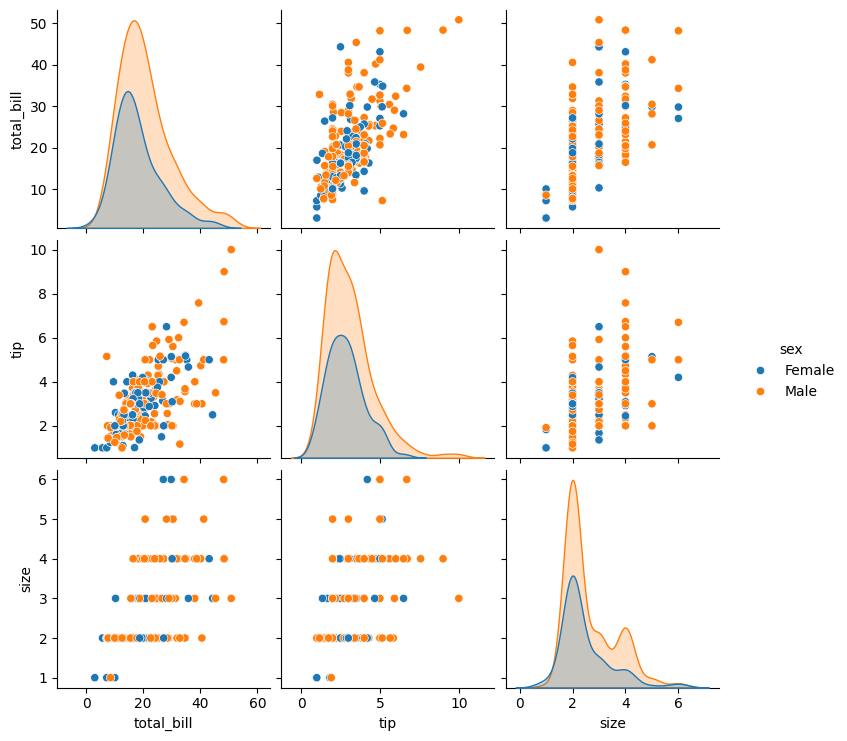

In [ ]:
# 🔎 3. Visualizaciones exploratorias

sns.pairplot(df, hue='sex')

fig = px.scatter(df, x='total_bill', y='tip', color='day', size='size', hover_data=['sex'])
fig.show()

fig = px.sunburst(df, path=['day', 'time', 'sex'], values='total_bill', title="Sunburst Chart")
fig.show()


In [ ]:
# ⚙️ 4. Segmentación (Clustering)

X = df[['total_bill', 'tip', 'size']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

fig = px.scatter_3d(df, x='total_bill', y='tip', z='size', color='cluster', symbol='sex')
fig.show()


In [ ]:
# 📉 5. Reducción de dimensionalidad con PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PC1'], df['PC2'] = components[:, 0], components[:, 1]

fig = px.scatter(df, x='PC1', y='PC2', color='cluster', hover_data=['sex', 'day'])
fig.show()


# 6. Conclusiones (Realizar cada uno de los estudiantes)

---



# - ¿Qué grupos de clientes se encontraron?
# - ¿Qué patrones de consumo se detectaron?
# - ¿Qué recomendaciones de negocio puedes proponer?